### Goal:
## Explore the BMW Worldwide Sales dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?

#### 1. Learn data cleaning with Pandas.
#### 2. Use NumPy for calculations (mean, median, etc.).
#### 3. Visualize trends using Matplotlib and Seaborn.
#### 4. Understand the relationship between sales features (Year, Model, Region) and sales figures.

### 2. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [2]:
df = pd.read_csv("BMW sales data.csv")
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low



### 4. Explore Data

In [3]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (50000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None
Model                   0
Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission

### Insights:
#### 1. Dataset contains BMW sales records from 2010 to 2024.
#### 2. Columns include Year, Model, Region, and Sales.
#### 3. Understanding missing values helps guide cleaning and analysis.

### 5. Data Cleaning

In [6]:
df['Sales_Volume'] = df['Sales_Volume'].fillna(df['Sales_Volume'].median())
# Fill missing region values with mode
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
# Drop rows with missing Model
df = df.dropna(subset=['Model'])


### Insights:
#### 1. Filling Sales_Volume ensures numeric analysis is accurate.
#### 2. Filling Region ensures categorical analysis works.
#### 3. Dropping missing Model rows maintains data integrity.

### 6. Analysis with NumPy & Pandas

In [7]:
# Total sales
total_sales = np.sum(df['Sales_Volume'])
print("Total Sales:", total_sales)

# Average sales per year
avg_sales_per_year = df.groupby('Year')['Sales_Volume'].mean()
print("Average Sales per Year:\n", avg_sales_per_year)

# Sales by model
sales_by_model = df.groupby('Model')['Sales_Volume'].sum()
print("Sales by Model:\n", sales_by_model)

# Sales by region
sales_by_region = df.groupby('Region')['Sales_Volume'].sum()
print("Sales by Region:\n", sales_by_region)

Total Sales: 253375734
Average Sales per Year:
 Year
2010    5085.118619
2011    5112.550641
2012    5027.579532
2013    5071.176488
2014    5062.376119
2015    5065.576831
2016    5039.390788
2017    5051.918237
2018    5006.794692
2019    5068.383255
2020    5089.186583
2021    5007.314947
2022    5152.658424
2023    5053.946567
2024    5114.634958
Name: Sales_Volume, dtype: float64
Sales by Model:
 Model
3 Series    23281303
5 Series    23097519
7 Series    23786466
M3          22349694
M5          22779688
X1          23406060
X3          22745529
X5          22709749
X6          22661986
i3          23133849
i8          23423891
Name: Sales_Volume, dtype: int64
Sales by Region:
 Region
Africa           41565252
Asia             42974277
Europe           42555138
Middle East      42326620
North America    42402629
South America    41551818
Name: Sales_Volume, dtype: int64


### Insights:
#### 1. Total sales shows overall company performance.
#### 2. Average sales per year reveal trends over time.
#### 3. Sales by Model and Region indicate top-performing models and markets.

### 7. Visualization with Matplotlib


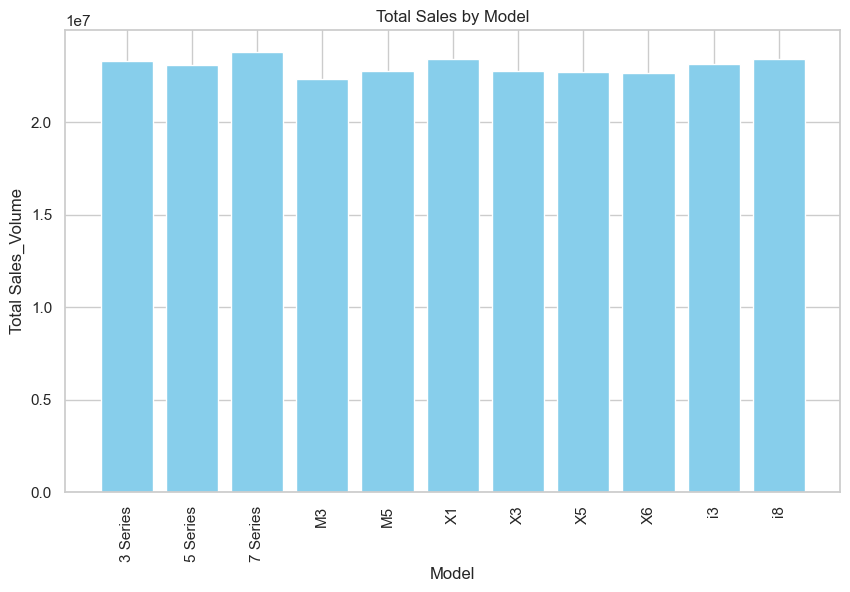

In [8]:
# Bar plot: total sales by model
plt.figure(figsize=(10,6))
plt.bar(sales_by_model.index, sales_by_model.values, color='skyblue')
plt.title("Total Sales by Model")
plt.xlabel("Model")
plt.ylabel("Total Sales_Volume")
plt.xticks(rotation=90)
plt.show()

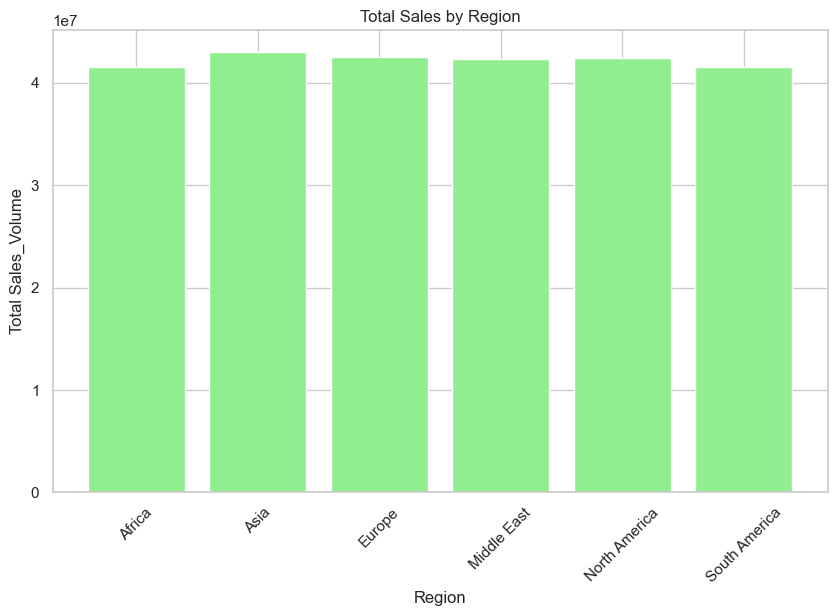

In [9]:
# Bar plot: total sales by region
plt.figure(figsize=(10,6))
plt.bar(sales_by_region.index, sales_by_region.values, color='lightgreen')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales_Volume")
plt.xticks(rotation=45)
plt.show()

### Insights:
#### 1. Visuals highlight which models and regions generate most revenue.
#### 2. Yearly trends are easily identified for forecasting.

### 8. Visualization with Seaborn

### Heatmap: correlation between numerical features

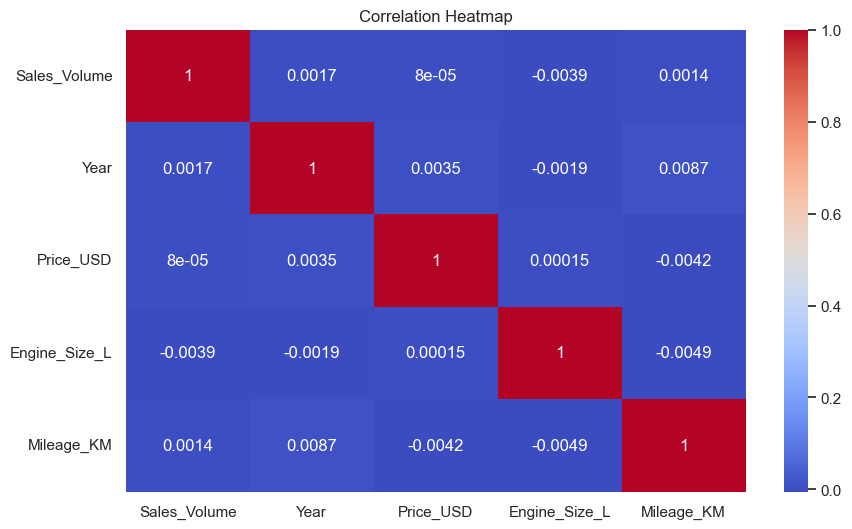

In [10]:
corr = df[['Sales_Volume', 'Year', 'Price_USD', 'Engine_Size_L', 'Mileage_KM']].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### Insights:
#### 1. Correlation heatmap shows relationship between Sales_Volume and other numeric features.


### Boxplot: sales distribution by region

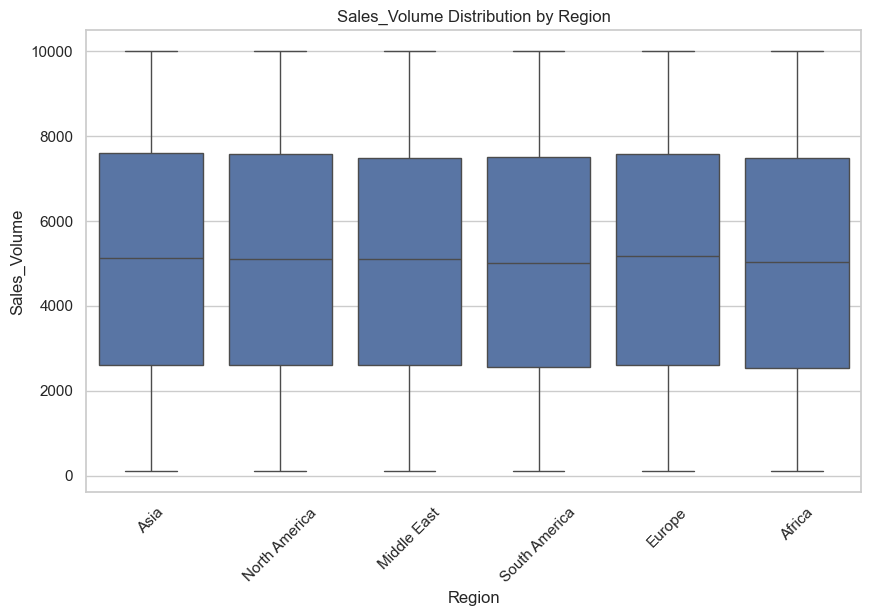

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Sales_Volume', data=df)
plt.title("Sales_Volume Distribution by Region")
plt.xticks(rotation=45)
plt.show()

### Insights:
#### Boxplot highlights distribution and outliers per region.